# Assignment 2: Joukowski Transformation
## 1. Complex numbers in Python

In [55]:
import numpy
import math
from matplotlib import pyplot

%matplotlib inline
%run ./definitions.ipynb

In [56]:
a = 3
b = 3
z = a + b*1j
print('z = ',z)
print('The type of variable is ',type(z))

z =  (3+3j)
The type of variable is  <class 'complex'>


### Exercises:

In [57]:
ans1 = (2.75 + 3.69*1j) * (8.55 - 6.13*1j)
ans2 = 1.4 * numpy.exp(5.32*1j)
ans3 = (7.51 - 9.15*1j)/(4.43 + 9.64*1j)
print('1. ',ans1)
print('2. ',ans2)
print('3. ',ans3)

1.  (46.1322+14.692000000000004j)
2.  (0.799270785858-1.1494199454j)
3.  (-0.4880897698448308-1.0033441577191493j)


## 2. Shapes created by the Joukowski Transform
Define a function that takes z and c as parameters, and returns the Joukowski transformation of z

In [58]:
def joukowski(z,c):
    """
    write the stuff
    """
    xi = z + c**2/z
    
    return xi

### Exercises:
We will generate several patterns using the Joukowski Transform. 

** Part 1 **

In the first example of the Joukowski transform we plot a cicle with a radius larger than c centered on the origin on the z-plane. When transformed to the $\xi$-plane, we see in the next couple of cells that it takes the shape of an ellipse

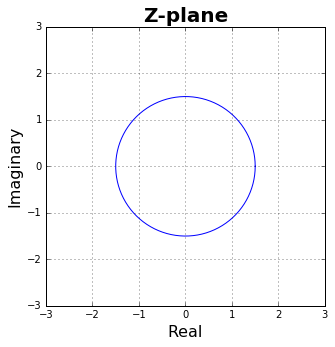

In [59]:
r = 1.5
theta = numpy.linspace(0,2*math.pi,100)
z_circ = r*numpy.cos(theta) + r*numpy.sin(theta)*1j

# plot
size = 5
pyplot.figure(figsize=(size,size))
pyplot.xlim(-3.0,3.0)
pyplot.ylim(-3.0,3.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title('Z-plane',fontsize=20,fontweight='bold')
pyplot.grid(True)
pyplot.plot(z_circ.real,z_circ.imag);

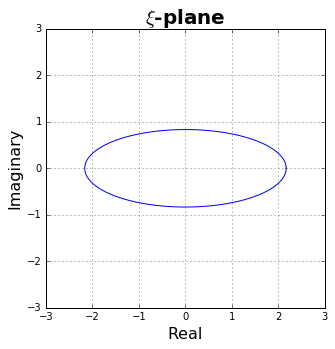

In [60]:
c = 1
xi = joukowski(z_circ,c)

chi = xi.real
eta = xi.imag

pyplot.figure(figsize=(size,size))
pyplot.xlim(-3.0,3.0)
pyplot.ylim(-3.0,3.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title(r'$\xi$-plane',fontsize=20,fontweight='bold')
pyplot.grid(True)
pyplot.plot(chi,eta);

** Part 2 **

In the next example we transform a circle with a radius between c and 2c centered slightly off of the origin from the z to $\xi$-plane. The Joukowski transformation creates a symmetric airfoil shape at zero angle of attack

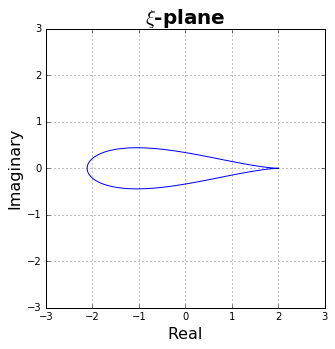

In [61]:
r = 1.2
c = 1
xc = c-r
yc = 0

z_circ = r*numpy.cos(theta) + xc + (r*numpy.sin(theta) + yc)*1j
xi = joukowski(z_circ,c)

pyplot.figure(figsize=(size,size))
pyplot.xlim(-3.0,3.0)
pyplot.ylim(-3.0,3.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title(r'$\xi$-plane',fontsize=20,fontweight='bold')
pyplot.grid(True)
pyplot.plot(xi.real,xi.imag);

** Part 3 **

Finally we transform a circle centered slightly off from the origin in both the x and y-direction with a radius defined by the offset and the value of c. In the $\xi$-plane this creates a cambered airfoil

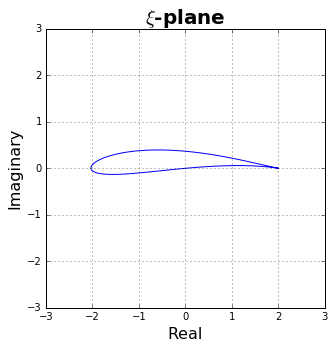

In [62]:

c = 1
xc = -0.1
yc = 0.1
r = numpy.sqrt((c-xc)**2+yc**2)

z_circ = r*numpy.cos(theta) + xc + (r*numpy.sin(theta) + yc)*1j
xi = joukowski(z_circ,c)

pyplot.figure(figsize=(size,size))
pyplot.xlim(-3.0,3.0)
pyplot.ylim(-3.0,3.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title(r'$\xi$-plane',fontsize=20,fontweight='bold')
pyplot.grid(True)
pyplot.plot(xi.real,xi.imag);

** Part 4 **

The point that corresponds to the trailing edge of the airfoil is at $\theta$ = 0

## 3. Grid points on the z-plane using polar coordinates

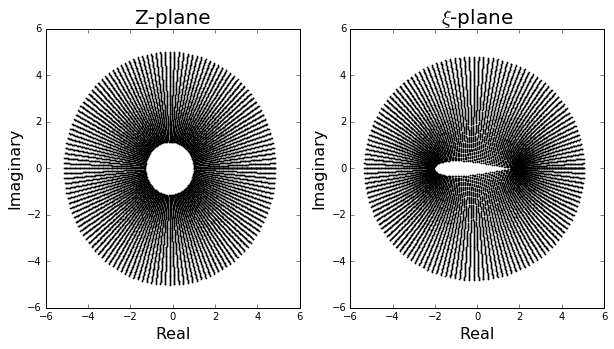

In [63]:
c = 1
R = 1.15
xc = -0.15
yc = 0

N_r = 100
N_theta = 145

theta = numpy.linspace(0,2*math.pi,N_theta)
r = numpy.linspace(R,5,N_r)

Rad, Theta = numpy.meshgrid(r,theta)

z = Rad*numpy.cos(Theta) + xc + (Rad*numpy.sin(Theta) + yc)*1j
xi = joukowski(z,c)

size = 5
pyplot.figure(figsize=(2*size,size))
pyplot.subplot(121)
pyplot.xlim(-6.0,6.0)
pyplot.ylim(-6.0,6.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title('Z-plane',fontsize=20)
pyplot.scatter(z.real,z.imag,color='k',s=0.5,marker='o')

pyplot.subplot(122)
pyplot.xlim(-6.0,6.0)
pyplot.ylim(-6.0,6.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title(r'$\xi$-plane',fontsize=20)
pyplot.scatter(xi.real,xi.imag,color='k',s=0.5,marker='o');

## 4. Flow over a symmetric Joukowski airfoil with zero angle of attack

### Stream functions and streamlines


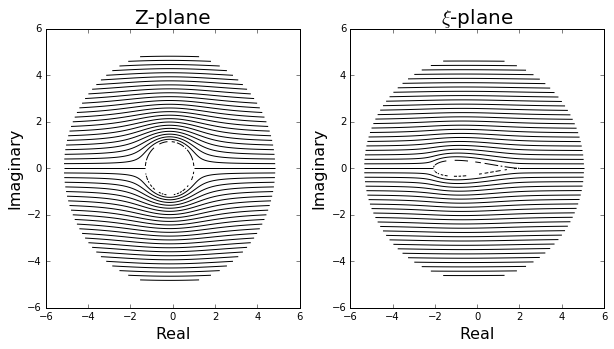

In [64]:
u_inf = 1.0
kappa = 2*R**2*math.pi*u_inf

psi_doublet = get_stream_function_doublet(kappa,xc,yc,z.real,z.imag)
psi_freestream = u_inf*z.imag

psi = psi_doublet + psi_freestream

levels = numpy.linspace(-psi.max(),psi.max(),51)

size = 5
pyplot.figure(figsize=(2*size,size))
pyplot.subplot(121)
pyplot.xlim(-6.0,6.0)
pyplot.ylim(-6.0,6.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title('Z-plane',fontsize=20)
pyplot.contour(z.real, z.imag, psi, levels=levels, colors='k', linewidths=1, linestyles='solid')

pyplot.subplot(122)
pyplot.xlim(-6.0,6.0)
pyplot.ylim(-6.0,6.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title(r'$\xi$-plane',fontsize=20)
pyplot.contour(xi.real, xi.imag, psi, levels=levels, colors='k', linewidths=1, linestyles='solid');

### Velocity vectors and pressure coeffecients 

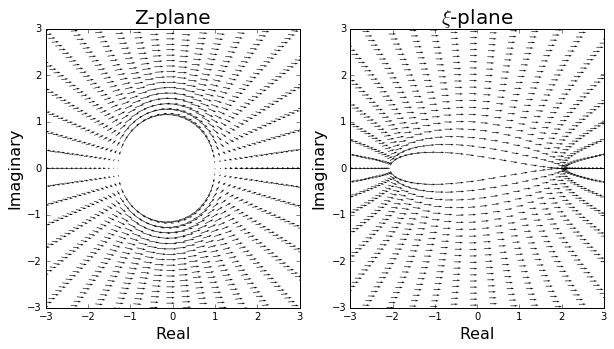

In [65]:
u_doublet, v_doublet = get_velocity_doublet(kappa,xc,yc,z.real,z.imag)

u_freestream = u_inf*numpy.ones(numpy.shape(z.real))
v_freestream = numpy.zeros(numpy.shape(z.imag))

u = u_doublet + u_freestream
v = v_doublet + v_freestream

size = 5
pyplot.figure(figsize=(2*size,size))
pyplot.subplot(121)
pyplot.xlim(-3.0,3.0)
pyplot.ylim(-3.0,3.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title('Z-plane',fontsize=20)
pyplot.quiver(z.real[::3,::3],z.imag[::3,::3],u[::3,::3],v[::3,::3],scale=10,scale_units='inches')

w = u - v*1j
xi_velocity = w/(1-(c/z)**2)

pyplot.subplot(122)
pyplot.xlim(-3.0,3.0)
pyplot.ylim(-3.0,3.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title(r'$\xi$-plane',fontsize=20)
pyplot.quiver(xi.real[::3,::3],xi.imag[::3,::3],xi_velocity.real[::3,::3],-xi_velocity.imag[::3,::3],scale=10,scale_units='inches');

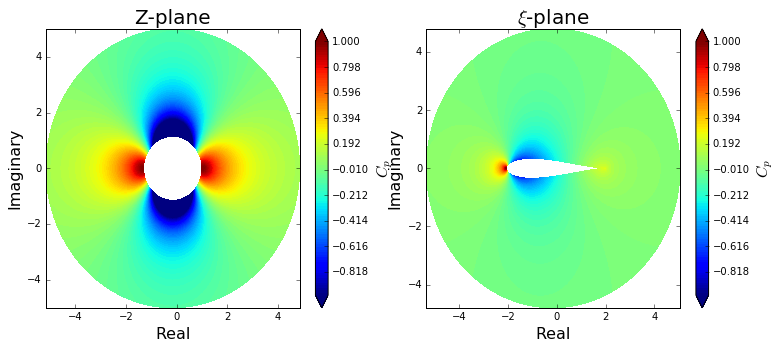

In [66]:
cp = 1 - (u**2 + v**2)/u_inf**2

size = 5
pyplot.figure(figsize=(2.5*size,size))
pyplot.subplot(121)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title('Z-plane',fontsize=20)
contf = pyplot.contourf(z.real, z.imag, cp, levels=numpy.linspace(-1, 1, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

xi_cp = 1 - (xi_velocity.real**2 + xi_velocity.imag**2)/u_inf**2

pyplot.subplot(122)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title(r'$\xi$-plane',fontsize=20)
contf = pyplot.contourf(xi.real, xi.imag, xi_cp, levels=numpy.linspace(-1, 1, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

### Questions

In [67]:
print('1. The strength of the doublet is',kappa)
print('2. The velocity at the 62nd point on the airfoil is',xi_velocity[61,0])
print('3. The minimum pressure coefficient on the airfoil surface is',xi_cp.min())

1. The strength of the doublet is 8.309512568745001
2. The velocity at the 62nd point on the airfoil is (1.10633846629-0.523633349298j)
3. The minimum pressure coefficient on the airfoil surface is -0.687755674092


## 5. Flow over a symmetric Joukowski airfoil with non-zero angle of attack, without circulation

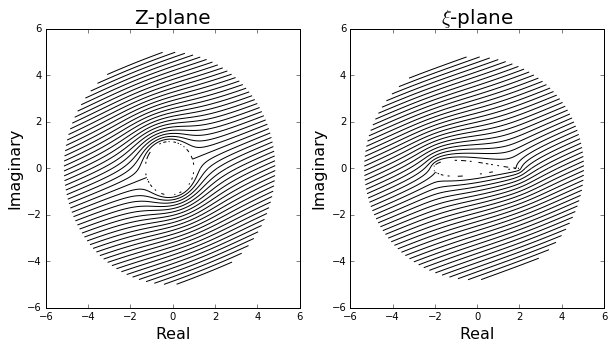

In [68]:
aoa = 20*math.pi/180
zp = (z - (xc + yc*1j))*numpy.exp(-1j*aoa)
xip = joukowski(zp,c)

psi_doubletp = get_stream_function_doublet(kappa,0,0,zp.real,zp.imag)
psi_freestreamp = u_inf*zp.imag

psip = psi_doubletp + psi_freestreamp

levels = numpy.linspace(-psip.max(),psip.max(),51)

size = 5
pyplot.figure(figsize=(2*size,size))
pyplot.subplot(121)
pyplot.xlim(-6.0,6.0)
pyplot.ylim(-6.0,6.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title('Z-plane',fontsize=20)
pyplot.contour(z.real, z.imag, psip, levels=levels, colors='k', linewidths=1, linestyles='solid')

pyplot.subplot(122)
pyplot.xlim(-6.0,6.0)
pyplot.ylim(-6.0,6.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title(r'$\xi$-plane',fontsize=20)
pyplot.contour(xi.real, xi.imag, psip, levels=levels, colors='k', linewidths=1, linestyles='solid');

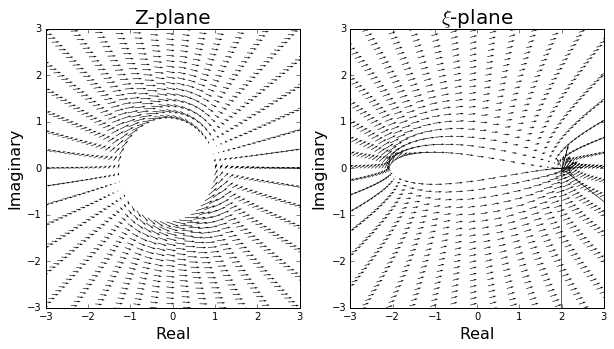

In [69]:
u_doublet, v_doublet = get_velocity_doublet(kappa,0,0,zp.real,zp.imag)

u_freestream = u_inf*numpy.ones(numpy.shape(zp.real))
v_freestream = numpy.zeros(numpy.shape(zp.imag))

u = u_doublet + u_freestream
v = v_doublet + v_freestream

size = 5
pyplot.figure(figsize=(2*size,size))
pyplot.subplot(121)
pyplot.xlim(-3.0,3.0)
pyplot.ylim(-3.0,3.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title('Z-plane',fontsize=20)
pyplot.quiver(z.real[::3,::3],z.imag[::3,::3],u[::3,::3],v[::3,::3],scale=10,scale_units='inches')

w = u - v*1j
wp = w*numpy.exp(-1j*aoa)
xi_velocity = wp/(1-(c/z)**2)

pyplot.subplot(122)
pyplot.xlim(-3.0,3.0)
pyplot.ylim(-3.0,3.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title(r'$\xi$-plane',fontsize=20)
pyplot.quiver(xi.real[::3,::3],xi.imag[::3,::3],xi_velocity.real[::3,::3],-xi_velocity.imag[::3,::3],scale=10,scale_units='inches');

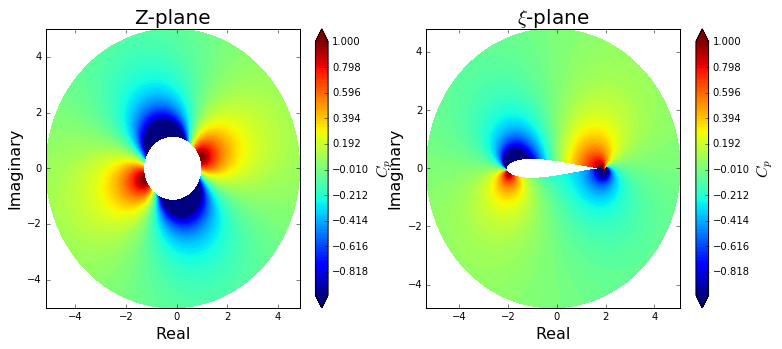

In [70]:
cp = 1 - (u**2 + v**2)/u_inf**2

size = 5
pyplot.figure(figsize=(2.5*size,size))
pyplot.subplot(121)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title('Z-plane',fontsize=20)
contf = pyplot.contourf(z.real, z.imag, cp, levels=numpy.linspace(-1, 1, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

xi_cp = 1 - (xi_velocity.real**2 + xi_velocity.imag**2)/u_inf**2

pyplot.subplot(122)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title(r'$\xi$-plane',fontsize=20)
contf = pyplot.contourf(xi.real, xi.imag, xi_cp, levels=numpy.linspace(-1, 1, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

### Questions
1. This airfoil would not be reasonable for actual use as the pressure ends up being equal about the x-axis

In [72]:
cpmax = numpy.amax(xi_cp)
stagn1, stagn2 = numpy.where(xi_cp==cpmax)
print('2. The stagnation points occur at',stagn1,'and',stagn2,'when the trailing edge is the 0 point')

2. The stagnation points occur at [ 8 80] and [0 0] when the trailing adge is the 0 point


3: There is 0 lift

4: There is 0 drag

In [75]:
print('5. The velocity at the 50th point on the airfoil surface is',xi_velocity[49,0])
print('6. The pressure coefficient at the 75th point is',xi_cp[74,0])

5. The velocity at the 50th point on the airfoil surface is (1.48306541501-0.0920754950073j)
6. The pressure coefficient at the 75th point is -0.485209916437


## 6. Flow over a symmetric Joukowski air-foil with non-zero angle of attack, with circulation

Use $\ \frac{\Gamma}{4\pi U_\infty R} =1$ to get gamma

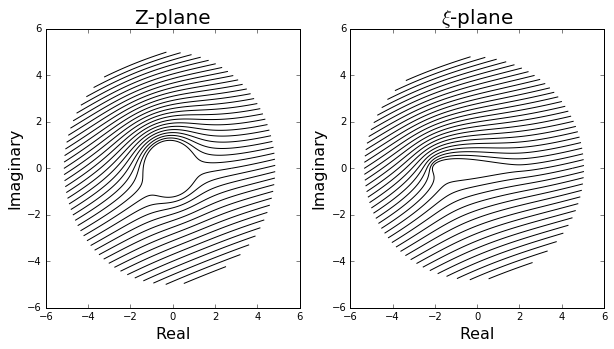

In [51]:
gamma = 4*math.pi*u_inf*R*numpy.sin(aoa)
psi_vortex = get_stream_function_vortex(gamma,xc,yc,z.real,z.imag)
psi_all = psip + psi_vortex

levels = numpy.linspace(-psi_all.max(),psi_all.max(),51)

size = 5
pyplot.figure(figsize=(2*size,size))
pyplot.subplot(121)
pyplot.xlim(-6.0,6.0)
pyplot.ylim(-6.0,6.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title('Z-plane',fontsize=20)
pyplot.contour(z.real, z.imag, psi_all, levels=levels, colors='k', linewidths=1, linestyles='solid')

pyplot.subplot(122)
pyplot.xlim(-6.0,6.0)
pyplot.ylim(-6.0,6.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title(r'$\xi$-plane',fontsize=20)
pyplot.contour(xi.real, xi.imag, psi_all, levels=levels, colors='k', linewidths=1, linestyles='solid');

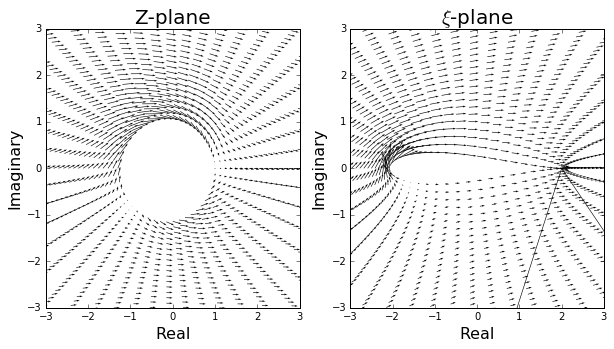

In [47]:
u_vortex, v_vortex = get_velocity_vortex(gamma,xc,yc,zp.real,zp.imag)

u_all = u + u_vortex
v_all = v + v_vortex

size = 5
pyplot.figure(figsize=(2*size,size))
pyplot.subplot(121)
pyplot.xlim(-3.0,3.0)
pyplot.ylim(-3.0,3.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title('Z-plane',fontsize=20)
pyplot.quiver(z.real[::3,::3],z.imag[::3,::3],u_all[::3,::3],v_all[::3,::3],scale=10,scale_units='inches')

w = u_all - v_all*1j
wp = w*numpy.exp(-1j*aoa)
xi_velocity = wp/(1-(c/z)**2)

pyplot.subplot(122)
pyplot.xlim(-3.0,3.0)
pyplot.ylim(-3.0,3.0)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title(r'$\xi$-plane',fontsize=20)
pyplot.quiver(xi.real[::3,::3],xi.imag[::3,::3],xi_velocity.real[::3,::3],-xi_velocity.imag[::3,::3],scale=10,scale_units='inches');

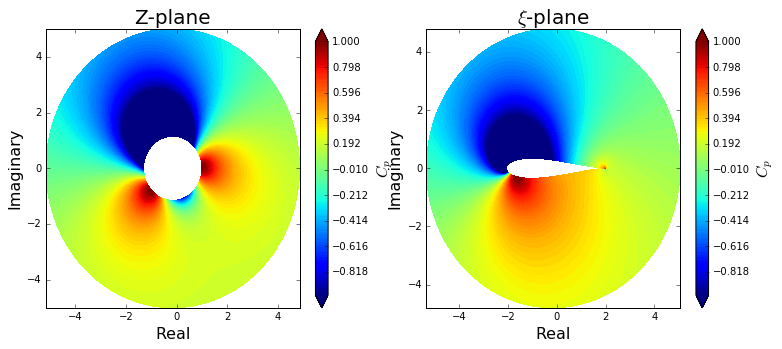

In [48]:
cp = 1 - (u_all**2 + v_all**2)/u_inf**2

size = 5
pyplot.figure(figsize=(2.5*size,size))
pyplot.subplot(121)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title('Z-plane',fontsize=20)
contf = pyplot.contourf(z.real, z.imag, cp, levels=numpy.linspace(-1, 1, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

xi_cp = 1 - (xi_velocity.real**2 + xi_velocity.imag**2)/u_inf**2

pyplot.subplot(122)
pyplot.xlabel('Real',fontsize=16)
pyplot.ylabel('Imaginary',fontsize=16)
pyplot.title(r'$\xi$-plane',fontsize=20)
contf = pyplot.contourf(xi.real, xi.imag, xi_cp, levels=numpy.linspace(-1, 1, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

In [24]:
print('1. The strength of the vortex is',gamma)

1. The strength of the vortex is 4.9426446604


In [25]:
L = u_inf*gamma*numpy.cos(aoa)

print('2. The lift is',L)

2. The lift is 4.64456671454


In [49]:
xi_velocity[91,0]

(0.12666779826351549+0.066167509028275256j)

In [50]:
xi_cp[110,0]

0.50371663939896805